In [79]:
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

In [80]:
# Parámetros

lamda = 532.0  # nm
k0 = 2 * np.pi / lamda

theta0 = 10
thetaN = 80
dtheta = 0.1
N = int((thetaN - theta0) / dtheta)
theta = np.arange(theta0, thetaN, dtheta)
# Espesor de capas

d = [0, 25, 25] 
dt = sum(d)

# Constantes ópticas de los materiales
material = ['ZnSe','Ag','Au','Air']

In [81]:
# Introducción de los datos experimentales del indice de refracción de los materiales
linkAg = 'https://refractiveindex.info/database/data-nk/main/Ag/Ciesielski.yml'
linkAir = 'https://refractiveindex.info/tmp/database/data-nk/other/mixed%20gases/air/Ciddor.txt'
linkAl = 'https://refractiveindex.info/database/data-nk/main/Al/Cheng.yml'
linkAl2O3 = 'https://refractiveindex.info/database/data-nk/main/Al2O3/Boidin.yml'
linkAu = 'https://refractiveindex.info/database/data-nk/main/Au/Magnozzi-25C.yml'
linkBK7r = 'https://refractiveindex.info/tmp/database/data-nk/glass/schott/N-BK7.txt'
linkBK7i = 'https://refractiveindex.info/database/data-nk/glass/schott/N-BK7.yml'
linkCo = 'https://refractiveindex.info/database/data-nk/main/Co/Werner.yml'
linkCr = 'https://refractiveindex.info/database/data-nk/main/Cr/Sytchkova.yml'
linkCu = 'https://refractiveindex.info/tmp/database/data-nk/main/Cu/McPeak.txt'
linkGraphene = 'https://refractiveindex.info/database/data-nk/main/C/Tikuisis.yml'
linkNb = 'https://refractiveindex.info/database/data-nk/main/Nb/Weaver.yml'
linkMgO = 'https://refractiveindex.info/tmp/database/data-nk/main/MgO/Stephens.txt'
linkSi = 'https://refractiveindex.info/database/data-nk/main/Si/Schinke.yml'
linkSiO = 'https://refractiveindex.info/tmp/database/data-nk/main/SiO/Hass.txt'
linkSiO2 = 'https://refractiveindex.info/tmp/database/data-nk/main/SiO2/Rodriguez-de%20Marcos.txt'
linkZnSer = 'https://refractiveindex.info/tmp/database/data-nk/main/ZnSe/Amotchkina.txt'
linkZnSei = 'https://refractiveindex.info/database/data-nk/main/ZnSe/Amotchkina.yml'

datosAg = pd.read_csv(linkAg, sep='\s+', 
            skiprows = 9, skipfooter = 5, header = None)
datosAg = np.array(datosAg, dtype = float)
datosAir = pd.read_csv(linkAir, sep='\s+', 
            skiprows = 2, skipfooter = 0, header = None)
datosAir = np.array(datosAir, dtype = float)
datosAl = pd.read_csv(linkAl, sep='\s+', 
            skiprows = 10, header = None)
datosAl = np.array(datosAl, dtype = float)
datosAl2O3 = pd.read_csv(linkAl2O3, sep='\s+', 
            skiprows = 11, skipfooter = 0, header = None)
datosAl2O3 = np.array(datosAl2O3, dtype = float)
datosAu = pd.read_csv(linkAu, sep='\s+', 
            skiprows = 9, skipfooter = 5, header = None)
datosAu = np.array(datosAu, dtype = float)
datosBK7r = pd.read_csv(linkBK7r, sep='\s+', 
            skiprows = 2, skipfooter = 28, header = None)
datosBK7r = np.array(datosBK7r, dtype = float)
datosBK7i = pd.read_csv(linkBK7i, sep='\s+', 
            skiprows = 14, skipfooter = 24, header = None)
datosBK7i = np.array(datosBK7i, dtype = float)
datosCo = pd.read_csv(linkCo, sep='\s+', 
            skiprows = 9, skipfooter = 5, header = None)
datosCo = np.array(datosCo, dtype = float)
datosCr = pd.read_csv(linkCr, sep='\s+', 
            skiprows = 10, skipfooter = 10, header = None)
datosCr = np.array(datosCr, dtype = float)
datosCur = pd.read_csv(linkCu, sep='\s+', 
            skiprows = 1, skipfooter = 144, header = None)
datosCur = np.array(datosCur, dtype = float)
datosCui = pd.read_csv(linkCu, sep='\s+', 
            skiprows = 145, skipfooter = 1, header = None)
datosCui = np.array(datosCui, dtype = float)
datosGraphene = pd.read_csv(linkGraphene, sep='\s+', 
            skiprows = 10, skipfooter = 5, header = None)
datosGraphene = np.array(datosGraphene, dtype = float)
datosNb = pd.read_csv(linkNb, sep='\s+', 
            skiprows = 9, skipfooter = 4, header = None)
datosNb = np.array(datosNb, dtype = float)
datosMgO = pd.read_csv(linkMgO, sep='\s+', 
            skiprows = 2, skipfooter = 0, header = None)
datosMgO = np.array(datosMgO, dtype = float)
datosSi = pd.read_csv(linkSi, sep='\s+', 
            skiprows = 10, skipfooter = 5, header = None)
datosSi = np.array(datosSi, dtype = float)
datosSiOr = pd.read_csv(linkSiO, sep='\s+', 
            skiprows = 2, skipfooter = 58, header = None)
datosSiOr = np.array(datosSiOr, dtype = float)
datosSiOi = pd.read_csv(linkSiO, sep='\s+', 
            skiprows = 102, skipfooter = 1, header = None)
datosSiOi = np.array(datosSiOi, dtype = float)
datosSiO2r = pd.read_csv(linkSiO2, sep='\s+', 
            skiprows = 2, skipfooter = 400, header = None)
datosSiO2r = np.array(datosSiO2r, dtype = float)
datosSiO2i = pd.read_csv(linkSiO2, sep='\s+', 
            skiprows = 399, skipfooter = 1, header = None)
datosSiO2i = np.array(datosSiO2i, dtype = float)
datosZnSer = pd.read_csv(linkZnSer, sep='\s+', 
            skiprows = 1, skipfooter = 124, header = None)
datosZnSer = np.array(datosZnSer, dtype = float)
datosZnSei = pd.read_csv(linkZnSei, sep='\s+', 
            skiprows = 11, skipfooter = 3, header = None)
datosZnSei = np.array(datosZnSei, dtype = float)
#datosAu = pd.read_csv('Au_45nm_n_k.txt', sep='\s+', 
#            skiprows = 5, skipfooter = 0, header = None)
#datosAu = np.array(datosAu, dtype = float)

# Regresión lineal para los indices de refracción de los materiales 
def buscar_n(valor, datosAg):
    if datosAg.__class__ != np.ndarray:
        raise TypeError("Por favor ingrese un array de numpy")
    #fin if 
    dato_mayor = datosAg[datosAg[:,0] > valor,:][0]
    dato_menor = datosAg[datosAg[:,0] < valor,:][-1]
    y2 = dato_mayor[1:]
    y1 = dato_menor[1:]
    x2 = dato_mayor[0]
    x1 = dato_menor[0]
    m = (y2-y1)/(x2-x1)
    b = y2 - m*x2
    y1 = m*valor + b
    return y1

C:\Users\ElkinSe\AppData\Local\Temp\ipykernel_6104\151761116.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  datosAg = pd.read_csv(linkAg, sep='\s+',
C:\Users\ElkinSe\AppData\Local\Temp\ipykernel_6104\151761116.py:33: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  datosAu = pd.read_csv(linkAu, sep='\s+',
C:\Users\ElkinSe\AppData\Local\Temp\ipykernel_6104\151761116.py:36: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  datosBK7r = pd.read_csv(linkBK7r, sep='\s+',
C:\Users\ElkinSe\AppData\Local\Temp\ipykernel_6104\151761116.py:39: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can a

In [82]:
# Indices de refracción basado en los datos proporcionados
indice_refraccion_datal = {
    "Ag": complex(buscar_n(0.001*lamda,datosAg)[0],buscar_n(0.001*lamda,datosAg)[1]),  # Ag
    "Air": complex(buscar_n(0.001*lamda,datosAir)[0], 0),  # Aire
    "Al": complex(buscar_n(0.001*lamda,datosAl)[0],buscar_n(0.001*lamda,datosAl)[1]),  # Al
    "Al2O3": complex(buscar_n(0.001*lamda,datosAl2O3)[0], 0),  # Al2O3
    "Au": complex(buscar_n(0.001*lamda,datosAu)[0],buscar_n(0.001*lamda,datosAu)[1]),  # Au
    "BK7": complex(buscar_n(0.001*lamda,datosBK7r)[0], 0),  # BK7
    "Co": complex(buscar_n(0.001*lamda,datosCo)[0],buscar_n(0.001*lamda,datosCo)[1]),  # Co
    "Cr": complex(buscar_n(0.001*lamda,datosCr)[0],buscar_n(0.001*lamda,datosCr)[1]),  # Cr
    "Cu": complex(buscar_n(0.001*lamda,datosCur)[0],buscar_n(0.001*lamda,datosCui)[0]),  # Cu
    "Graphene": complex(buscar_n(0.001*lamda,datosGraphene)[0],buscar_n(0.001*lamda,datosGraphene)[1]),  # Graphene
    "Nb": complex(buscar_n(0.001*lamda,datosNb)[0],buscar_n(0.001*lamda,datosNb)[1]),  # Nb
    "MgO": complex(buscar_n(0.001*lamda,datosMgO)[0],0),  # MgO 
    "Si": complex(buscar_n(0.001*lamda,datosSi)[0],buscar_n(0.001*lamda,datosSi)[1]),  # Si
    "SiO": complex(buscar_n(0.001*lamda,datosSiOr)[0],buscar_n(0.001*lamda,datosSiOi)[0]),  # SiO 
    "SiO2": complex(buscar_n(0.001*lamda,datosSiO2r)[0],buscar_n(0.001*lamda,datosSiO2i)[0]),  # SiO2
    "ZnSe": complex(buscar_n(0.001*lamda,datosZnSer)[0],buscar_n(0.001*lamda,datosZnSei)[0]),  # ZnSe 
}
n = []

for mat in material:
    indice_de_refraccionl = indice_refraccion_datal.get(mat)

    if indice_de_refraccionl is not None:
        n.append(indice_de_refraccionl)
    else:
        print(f'No se pudo obtener el índice de refracción para {mat}')
        
print (n)
num_indices = len(n)  # Obtener el número de índices de refracción
print (num_indices)

[(2.685875665875767+3.3450000000000027e-06j), (0.07454266958424506+3.0998358862144424j), (0.43558005+2.261023850000001j), (1.000278211298393+0j)]
4


In [83]:
def R_(n, d):
    R = []
    T = []
    Total = []

    for I in range(N):
        # Constantes de propagación y coeficientes de Fresnel
        kx = np.absolute(n[0]) * k0 * np.sin(np.radians(theta[I]))
        kz = np.zeros((num_indices,), dtype=complex)
        
        for i in range(num_indices):
            kz[i] = np.sqrt((n[i] * k0) ** 2 - kx ** 2)
        
        rj = np.zeros((num_indices-1,), dtype=complex)
        tj = np.zeros((num_indices-1,), dtype=complex)
        
        for i in range(num_indices-1):
            rj[i] = (n[i] ** 2 * kz[i+1] - n[i+1] ** 2 * kz[i]) / (n[i] ** 2 * kz[i+1] + n[i+1] ** 2 * kz[i])
            tj[i] = 1 + rj[i]
        
        # Cálculo de fi
        fi = np.zeros((num_indices-2,), dtype=complex)
        
        for i in range(num_indices-2):
            cosT = np.sqrt(1 - ((n[0] / n[i+1]) * np.sin(np.radians(theta[I]))) ** 2)
            fi[i] = n[i+1] * k0 * d[i+1] * cosT
        
        T_matrices = np.zeros((num_indices-1, 2, 2), dtype=complex)
        
        for i in range(num_indices-1):
            T_matrices[i][0, 0] = 1.0 / tj[i]
            T_matrices[i][0, 1] = 1.0 / tj[i] * rj[i]
            T_matrices[i][1, 0] = 1.0 / tj[i] * rj[i]
            T_matrices[i][1, 1] = 1.0 / tj[i]
        
        P_matrices = np.zeros((num_indices-2, 2, 2), dtype=complex)
        
        for i in range(num_indices-2):
            P_matrices[i][0, 0] = np.exp(-1j * fi[i])
            P_matrices[i][0, 1] = 0
            P_matrices[i][1, 1] = np.exp(1j * fi[i])
            P_matrices[i][1, 0] = 0
        
        m = [None] * (num_indices-1)
        
        for i in range(num_indices-1):
            if i <= num_indices-3:
                m[i] = np.dot(T_matrices[i], P_matrices[i])
            else:
                m[i] = T_matrices[num_indices-2]
        
        M = reduce(lambda x, y: np.dot(x, y), m)
        
        # Cálculo del coeficiente de reflexión 
        r = M[1][0] / M[0][0]
        # Cálculo del coeficiente de transmisión
        t = 1 / M[0][0]
        beta = (np.real(n[0]**2) / np.real(n[-1]**2)) * (np.real(kz[-1]) / np.real(kz[0]))

        # Cálculo de la reflectancia y transmitancia
        R.append(abs(r) ** 2)
        T.append(beta * abs(t) ** 2)
        Total.append(abs(r) ** 2 + abs(t) ** 2)
    
    return R, T, Total
R,T,Total = R_(n,d)

In [84]:
from scipy.interpolate import interp1d
from scipy.signal import find_peaks
# Aquí debería estar tu código original para calcular R en función de theta o la longitud de onda
# Supongamos que R está calculada para una serie de valores theta

def Q_(R):
  max_R = np.max(R)
  min_R = np.min(R)
  half_R = (max_R + min_R) / 2
  h_R = (max_R - min_R)

  # Interpolación para encontrar los puntos donde R cruza half_max_R
  interp_func = interp1d(theta, R - half_R, kind='linear')
  theta_fine = np.linspace(np.min(theta), np.max(theta), 10000)  # valores más finos de theta
  R_fine = interp_func(theta_fine)

  # Encuentra los picos de las cruces
  peaks, _ = find_peaks(-np.abs(R_fine))  # Encuentra los mínimos en la función de diferencia
  theta_crossings = theta_fine[peaks]
  if len(theta_crossings) >= 2:
    fwhm = (theta_crossings[-1] - theta_crossings[-2]) * (np.pi / 180)
    Q = round(h_R / fwhm ,3)

  else:
    print("No se encontraron suficientes cruces para calcular el FWHM.")

  return(Q)

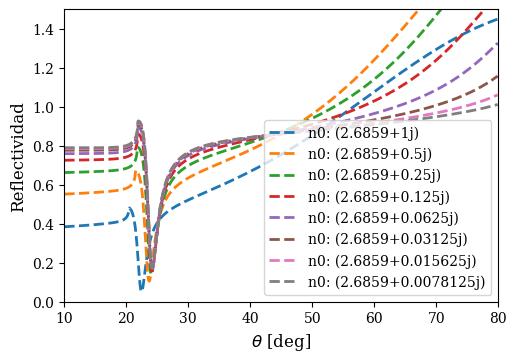

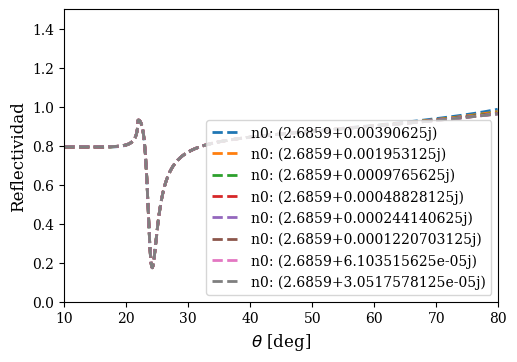

In [85]:
c = 0
for i in range(2):
  plt.rcParams['font.family'] = 'serif'
  plt.figure(figsize=(5.6, 3.8))

  plt.axis([10, 80, 0, 1.5])
  plt.xlabel(r'$\theta$ [deg]',fontsize=12)
  plt.ylabel('Reflectividad', fontsize=12)
  for j in range(8):
    n[0] = np.real(n[0])+ (0.5**c)*1j #BK7
    if c >=16:
      break
    c+=1
    R,T,Total = R_(n, d)
    Q = Q_(R)
    n_title= round(np.real(n[0]),4)+ 1j*np.imag(n[0])
    plt.plot(theta, R,linestyle='dashed', linewidth=2, label=f"n0: {n_title}")

  plt.legend()
  #plt.savefig("Resonancia{}.png".format(i), format='JPEG', bbox_inches='tight')
  plt.show()

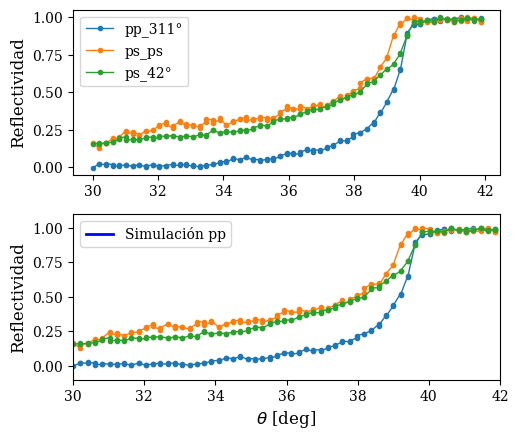

In [86]:
# Lista de nombres de archivos
file_names = [
    "ppm.txt", "ppm2.txt", "ppm3.txt","psps.txt", "psps2.txt","psm.txt", "psm2.txt"
]

# Ruta base de los archivos
base_path = "/Users/ElkinSe/Dropbox/Elkin Sepúlveda/SIMULADORES/Matriz transferencia/Total/Datos/"

# Nombres de las columnas
column_names = ["A", "Reflectance", "B", "Angle", "C", "D", "E", "F", "G"]

# Ajustes específicos para cada archivo
adjustments = {
    "ppm": 0.4, "ppm2": 0.4, "ppm3": 0.4, "psps": 0.4, "psps2": 0.5, "psm": 0.4, "psm2": 0.4
}

# Diccionario para almacenar los DataFrames y resultados
dataframes = {}
reflectance_results = {}
angle_results = {}
reflectance_fits = {}

# Iterar sobre la lista de archivos y procesar los datos
for file_name in file_names:
    # Leer el archivo
    df = pd.read_csv(base_path + file_name, sep='\t', dtype=float)
    # Asignar nombres de columnas
    df.columns = column_names
    # Obtener el nombre clave (sin extensión)
    key = file_name.split('.')[0]
    # Almacenar el DataFrame en el diccionario
    dataframes[key] = df
    
    # Aplicar ajuste de Reflectance
    adjustment = adjustments[key]
    reflectance = df["Reflectance"] * 10**3 - adjustment
    reflectance_results[key] = reflectance
    
    # Almacenar el ángulo
    angle = df["Angle"]
    angle_results[key] = angle
    
    # Filtrar por ángulo <= 42
    mask_angle = angle <= 42
    ref_fit = reflectance[mask_angle].max()
    reflectance_fits[key] = ref_fit

# Configuración de la familia de fuentes
plt.rcParams['font.family'] = 'serif'

# Definición de las series de datos a graficar
series_to_plot = [
    ("ppm", "pp_311°"),
    ("psps2", "ps_ps"),
    ("psm", "ps_42°"),
    ("ppps", "pp_ps")
]

# Creación de la figura y los subgráficos
plt.figure(figsize=(5.2, 4))

# Primer subgráfico
plt.subplot(2, 1, 1)
for key, label in series_to_plot:
    angle = angle_results.get(key)
    reflectance = reflectance_results.get(key)
    fit_value = reflectance_fits.get(key)
    if angle is not None and reflectance is not None and fit_value is not None:
        plt.plot(angle, reflectance / fit_value, linewidth=1, marker='.', label=label)
plt.ylabel('Reflectividad', fontsize=12)
plt.legend()
plt.tight_layout()

# Segundo subgráfico
plt.subplot(2, 1, 2)
for key, _ in series_to_plot:
    angle = angle_results.get(key)
    reflectance = reflectance_results.get(key)
    fit_value = reflectance_fits.get(key)
    if angle is not None and reflectance is not None and fit_value is not None:
        plt.plot(angle, reflectance / fit_value, linewidth=1, marker='.')
# Ejemplo de serie simulada
theta = range(30, 43)  # Ajustar theta según los datos que tengas
R = [0.1 * t for t in theta]  # Sustituir por tus datos reales de simulación
plt.plot(theta, R, 'b', linewidth=2, label='Simulación pp')
# plt.plot(theta, Rs, 'r', linewidth=2, label='Simulación ps')  # Descomentar si tienes Rs

plt.axis([30, 42, -0.1, 1.1])
plt.xlabel(r'$\theta$ [deg]', fontsize=12)
plt.ylabel('Reflectividad', fontsize=12)
plt.legend()
plt.show()


0.010300000000000004


NameError: name 'half_Rr' is not defined

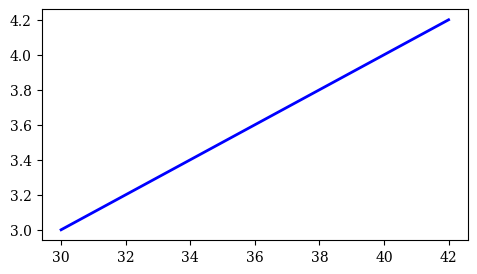

In [87]:
df_pol_rp = pd.read_csv("/Users/ElkinSe/Dropbox/Elkin Sepúlveda/SIMULADORES/Matriz transferencia/Total/Datos/Nb(0.5)-Au(40).txt",sep='\t', dtype=float)
df_pol_rp.columns = ["A", "Reflectance", "B", "Angle", "C", "D", "E", "F", "G"]

df_pol_rpr = pd.read_csv("/Users/ElkinSe/Dropbox/Elkin Sepúlveda/SIMULADORES/Matriz transferencia/Total/Datos/Nb(0.5)-Au(40)r.txt",sep='\t', dtype=float)
df_pol_rpr.columns = ["A", "Reflectance", "B", "Angle", "C", "D", "E", "F", "G"]

df_pol_rprr = pd.read_csv("/Users/ElkinSe/Dropbox/Elkin Sepúlveda/SIMULADORES/Matriz transferencia/Total/Datos/Nb(0.5)-Au(40)rr.txt",sep='\t', dtype=float)
df_pol_rprr.columns = ["A", "Reflectance", "B", "Angle", "C", "D", "E", "F", "G"]




ref_rp = df_pol_rp["Reflectance"]*10**3 - 0.21
ref_rpr = df_pol_rpr["Reflectance"]*10**3 - 0.21
ref_rprr = df_pol_rprr["Reflectance"]*10**3 -0.21



angle_rp = df_pol_rp["Angle"]
angle_rpr = df_pol_rpr["Angle"]
angle_rprr = df_pol_rprr["Angle"]



mask_angle_rp = angle_rp<=65
ref_rp_fitx = ref_rp[mask_angle_rp].max()
ref_rp_fitm = ref_rp[mask_angle_rp].min()
gap_rp = round(ref_rp_fitx-ref_rp_fitm,3)
mask_angle_rpr = angle_rpr<=65
ref_rpr_fitx = ref_rpr[mask_angle_rpr].max()
ref_rpr_fitm = ref_rpr[mask_angle_rpr].min()
gap_rpr = round(ref_rpr_fitx-ref_rpr_fitm,3)
mask_angle_rprr = angle_rprr<=65
ref_rprr_fitx = ref_rprr[mask_angle_rprr].max()
ref_rprr_fitm = ref_rprr[mask_angle_rprr].min()
gap_rprr = round(ref_rprr_fitx-ref_rprr_fitm,3)
print(ref_rprr_fitm)

plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(5.5, 3))
#plt.title("BK7-Nb"+"("+str(d1)+"nm)"+"-Au("+str(d2)+"nm)", fontsize=12)
plt.plot(theta, R, 'b', linewidth=2,label='Air(350nm)-Ag(20nm)-Co(10nm). '+f"Q: {Q}")
#plt.plot(theta, Re, 'r', linewidth=2,label='Medio efectivo.')
#plt.plot(theta, Rpp, 'purple', linestyle='dashdot', linewidth=2,label='Ag(55 nm). '+f"Q: {Qpp}")
#plt.plot(theta, Rpp2, 'r', linestyle='dashdot', linewidth=2,label='Al(20 nm). '+f"Q: {Qpp2}")
#plt.plot(angle_rprr, ref_rprr/1.4,'green', linewidth=1,  marker = '.', label='Experimental('f'Gap = {gap_rprr/1.41:.2f}).')
plt.axhline(half_Rr, color='purple', linestyle='dotted')
plt.axvline(theta_crossingsr[1], color='purple', linestyle='dotted')
plt.axvline(theta_crossingsr[2], color='purple', linestyle='dotted')
plt.axhline(half_R, color='r', linestyle='dotted')
for crossing in theta_crossings:
    plt.axvline(crossing, color='r', linestyle='dotted')
plt.axis([39, 50, 0, 1.3])
plt.xlabel(r'$\theta$ [deg]',fontsize=12)
plt.ylabel('Reflectivity', fontsize=12)
plt.legend()
#plt.savefig("Resonancia.JPEG", format='JPEG', bbox_inches='tight')
plt.show()